In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

IMREP_df = pd.read_csv("../summary_data/complete_sample/IMREP_merged_extracted_features.csv")
TRUST4_df = pd.read_csv("../summary_data/complete_sample/TRUST4_merged_extracted_features.csv")
MIXCR_df = pd.read_csv("../summary_data/complete_sample/MIXCR_merged_extracted_features.csv")
TCR_df = pd.read_csv("../summary_data/complete_sample/TCR_merged_extracted_features.csv")


# Rename TCR SAMPLE names based on 1:1 matchup in python dictionary:
Sample_name_matchup_RNA_TCR_dict = {
    "ESO1-sorted-T-cells_S13_L007" : "RearrangementDetails_ESO1_sorted_infusion",
    "INY1-sorted-T-cells_S14_L007" : "RearrangementDetails_INY1_sorted_infusion",
    "INY2-sorted-T-cells_S15_L007" : "RearrangementDetails_INY2_sorted_infusion",
    "TR2-PBMC_S12" : "RearrangementDetails_TR-PBMC",
    "SAR-11-14-12RNA_S1" : "SAR_11-14_PBMC",
    "MP-11-28-12RNA_S2" : "MP_11-28_PBMC",
    "CMT-baseline1C_CAGATC" : "Pt204_Baseline_TCR_seq",
    "HM-baseline1C_CGATGT" : "Pt310_baseline_TCRseq",
    "PT0310_S9" : "Pt310_on-tx_TCR_seq",
    "LEK-baseline_CGATGT" : "Pt294_baseline_TCR_seq",
    "LEK-OT110712A_CCGTCC" : "Pt294_on-tx_TCR_seq",
    "JSSBaseline-RNA_GTGAAA" : "Pt_308_baseline_TCR_seq",
    "RAS-baseline_TGACCA" : "Pt_325_baseline_TCR_seq",
    "PT0112-B_S3" : "Pt_112_baseline_TCR_seq",
    "PT0285-B_S5" : "Pt_285_baseline_TCR_seq"
}


for matchup in Sample_name_matchup_RNA_TCR_dict:
#     print(matchup)
#     print(Sample_name_matchup_RNA_TCR_dict[matchup])
    TCR_df.loc[(TCR_df['Sample'] == Sample_name_matchup_RNA_TCR_dict[matchup]), 'Sample' ] = matchup
# TCR_df.loc[TCR_df['Sample'] == "PT0285-B_S5"].head()




# Select Rows with nReads greater than 1
IMREP_df = IMREP_df[IMREP_df['nReads'] > 1]
TRUST4_df = TRUST4_df[TRUST4_df['nReads'] > 1]
MIXCR_df = MIXCR_df[MIXCR_df['nReads'] > 1]
TCR_df = TCR_df[TCR_df['nReads'] > 1]



# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_df["total_reads_in_sample"] = 0
TRUST4_df["total_reads_in_sample"] = 0
MIXCR_df["total_reads_in_sample"] = 0
TCR_df["total_reads_in_sample"] = 0

# print(IMREP_df.loc[IMREP_df['Sample'] == "CMT-baseline1C_CAGATC"]['nReads'].sum())

for sample in sample_names:
    total_imrep_sample_reads = IMREP_df.loc[IMREP_df['Sample'] == sample]['nReads'].sum()
    IMREP_df.loc[IMREP_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_sample_reads

    total_TRUST4_sample_reads = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['nReads'].sum()
    TRUST4_df.loc[TRUST4_df['Sample'] == sample, 'total_reads_in_sample'] = total_TRUST4_sample_reads

    total_MIXCR_sample_reads = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['nReads'].sum()
    MIXCR_df.loc[MIXCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_MIXCR_sample_reads
    
    total_TCR_sample_reads = TCR_df.loc[TCR_df['Sample'] == sample]['nReads'].sum()
    TCR_df.loc[TCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_TCR_sample_reads


# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_df["Frequency"] = IMREP_df['nReads'] / (IMREP_df['total_reads_in_sample'] * 1.0)
TRUST4_df["Frequency"] = TRUST4_df['nReads'] / (TRUST4_df['total_reads_in_sample'] * 1.0)
MIXCR_df["Frequency"] = MIXCR_df['nReads'] / (MIXCR_df['total_reads_in_sample'] * 1.0)
TCR_df["Frequency"] = TCR_df['nReads'] / (TCR_df['total_reads_in_sample'] * 1.0)  


# rename nReads and frequencies columns according to tool for proper merging.
IMREP_df = IMREP_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})
TRUST4_df = TRUST4_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})
MIXCR_df = MIXCR_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})
TCR_df = TCR_df.rename(columns={"nReads": "nReads_TCR", "Frequency": "Frequency_TCR"})

# IMREP_TRUST4_MIXCR_sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
#                                    'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
#                                    'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
#                                    'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
#                                    'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
#                                    'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']


# TCR_SAMPLE_NAMES = ['MP_11-28_PBMC' , 'Pt204_Baseline_TCR_seq' , 'Pt294_baseline_TCR_seq', 
#                     'Pt294_on-tx_TCR_seq' , 'Pt310_baseline_TCRseq' , 'Pt310_on-tx_TCR_seq',
#                     'Pt_112_baseline_TCR_seq' , 'Pt_285_baseline_TCR_seq', 'Pt_308_baseline_TCR_seq',
#                     'Pt_325_baseline_TCR_seq', 'RearrangementDetails_ESO1_sorted_infusion',
#                     'RearrangementDetails_INY1_sorted_infusion', 'RearrangementDetails_INY2_sorted_infusion',
#                     'RearrangementDetails_TR-PBMC' , 'SAR_11-14_PBMC']


# print(TCR_df["Sample"].unique())

# print(MIXCR_df["Sample"].unique())


TCR_df.head()

,Sample,CDR3,nReads_TCR,total_reads_in_sample,Frequency_TCR
2,MP-11-28-12RNA_S2,CASSETGAETQYF,4,18617,0.000215
4,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2,18617,0.000107
13,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2,18617,0.000107
17,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4,18617,0.000215
19,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2,18617,0.000107


## Complete dataframe containing clonotype frequencies across all samples and tools

In [13]:
# Merge dataframes based on two key combination: Sample and CDR3 combination. Outer join ensures no data is 
# lost for instances that do not have overlap.

merge_IMREP_TRUST4 = pd.merge(IMREP_df, TRUST4_df, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR = pd.merge(MIXCR_df, merge_IMREP_TRUST4, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR_TCR = pd.merge(TCR_df, merge_IMREP_TRUST4_MIXCR, how='outer', on=['Sample', 'CDR3']).fillna(0)

merge_IMREP_TRUST4_MIXCR_TCR.to_csv('../summary_data/complete_sample/all_tools.csv', index=False)
merge_IMREP_TRUST4_MIXCR_TCR.head()

,Sample,CDR3,nReads_TCR,total_reads_in_sample_x,Frequency_TCR,nReads_MIXCR,total_reads_in_sample_y,Frequency_MIXCR,nReads_IMREP,total_reads_in_sample_x,Frequency_IMREP,nReads_TRUST4,total_reads_in_sample_y,Frequency_TRUST4
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Table containing overlap of clonotypes across samples and tools 

In [14]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

clonotype_overlap_df = pd.DataFrame(samples, columns = ["Sample"])
clonotype_overlap_df["unique_clonotypes_TCR"] = 0
clonotype_overlap_df["unique_clonotypes_IMREP"] = 0
clonotype_overlap_df["unique_clonotypes_MIXCR"] = 0
clonotype_overlap_df["unique_clonotypes_TRUST4"] = 0

clonotype_overlap_df["overlap_TCR_IMREP"] = 0
clonotype_overlap_df["overlap_TCR_MIXCR"] = 0
clonotype_overlap_df["overlap_TCR_TRUST4"] = 0

clonotype_overlap_df["overlap_IMREP_MIXCR"] = 0
clonotype_overlap_df["overlap_IMREP_TRUST4"] = 0
clonotype_overlap_df["overlap_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4"] = 0
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4"] = 0



clonotype_overlap_df["overlap_TCR_IMREP_set"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_set"] = ""
clonotype_overlap_df["overlap_TCR_TRUST4_set"] = ""

clonotype_overlap_df["overlap_IMREP_MIXCR_set"] = ""
clonotype_overlap_df["overlap_IMREP_TRUST4_set"] = ""
clonotype_overlap_df["overlap_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4_set"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4_set"] = ""



clonotype_overlap_df["overlap_TCR_IMREP_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_TRUST4_dict_frequencies"] = ""


clonotype_overlap_df["overlap_IMREP_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_IMREP_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_IMREP_MIXCR_TRUST4_dict_frequencies"] = ""
clonotype_overlap_df["overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies"] = ""

In [15]:
# Get total unique clonotypes for each sample per tool
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in samples:
    
    total_unique_clonotypes_TCR = len(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TCR'] = total_unique_clonotypes_TCR

    total_unique_clonotypes_IMREP = len(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_IMREP'] = total_unique_clonotypes_IMREP
    
    total_unique_clonotypes_MIXCR = len(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_MIXCR'] = total_unique_clonotypes_MIXCR
    
    total_unique_clonotypes_TRUST4 = len(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique())    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'unique_clonotypes_TRUST4'] = total_unique_clonotypes_TRUST4
    


In [23]:
# Get overlapping clonotypes for each sample per: tool, number, and unique set:
df = merge_IMREP_TRUST4_MIXCR_TCR
for sample in samples:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())

    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))
    overlap_TCR_MIXCR = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR))
    overlap_TCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4))
    
    overlap_IMREP_MIXCR = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR))
    overlap_IMREP_TRUST4 = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_TRUST4))
    overlap_MIXCR_TRUST4 = list(total_unique_clonotypes_MIXCR.intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_IMREP_MIXCR = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR))
    overlap_TCR_IMREP_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_MIXCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    overlap_IMREP_MIXCR_TRUST4 = list(total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    overlap_TCR_IMREP_MIXCR_TRUST4 = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4))
    
    
    
#     Set of overlapping clonotypes per sample per tool
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_set'] = str(set(overlap_TCR_IMREP))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_set'] = str(set(overlap_TCR_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4_set'] = str(set(overlap_TCR_TRUST4))
    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_set"] = str(set(overlap_IMREP_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_TRUST4_set"] = str(set(overlap_IMREP_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_MIXCR_TRUST4_set"] = str(set(overlap_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_set"] = str(set(overlap_TCR_IMREP_MIXCR))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_TRUST4_set"] = str(set(overlap_TCR_IMREP_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_MIXCR_TRUST4_set"] = str(set(overlap_TCR_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_TRUST4_set"] = str(set(overlap_IMREP_MIXCR_TRUST4))
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_TRUST4_set"] = str(set(overlap_TCR_IMREP_MIXCR_TRUST4))
    
    
#     Number of overlapping clonotypes per sample per tool
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP'] = len(overlap_TCR_IMREP)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR'] = len(overlap_TCR_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4'] = len(overlap_TCR_TRUST4)

    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR"] = len(overlap_IMREP_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_TRUST4"] = len(overlap_IMREP_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_MIXCR_TRUST4"] = len(overlap_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR"] = len(overlap_TCR_IMREP_MIXCR)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_TRUST4"] = len(overlap_TCR_IMREP_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_MIXCR_TRUST4"] = len(overlap_TCR_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_IMREP_MIXCR_TRUST4"] = len(overlap_IMREP_MIXCR_TRUST4)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, "overlap_TCR_IMREP_MIXCR_TRUST4"] = len(overlap_TCR_IMREP_MIXCR_TRUST4)

    



In [24]:
#     Frequency dictionary of overlapping clonotypes per sample per tool, format: [TCR_freq, Tool_freq]
for sample in samples:

#   TCR    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
#   IMREP
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    IMREP_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)][['CDR3', 'Frequency_IMREP']]
    IMREP_Freq_dict = dict(zip(IMREP_Freq_df.CDR3, IMREP_Freq_df.Frequency_IMREP))

    
#   MIXCR
    total_unique_clonotypes_MIXCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)]['CDR3'].unique().tolist())
    MIXCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_MIXCR'] >1)][['CDR3', 'Frequency_MIXCR']]
    MIXCR_Freq_dict = dict(zip(MIXCR_Freq_df.CDR3, MIXCR_Freq_df.Frequency_MIXCR))

    
#   TRUST4
    total_unique_clonotypes_TRUST4 = set(df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)]['CDR3'].unique().tolist())
    TRUST4_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TRUST4'] >1)][['CDR3', 'Frequency_TRUST4']]
    TRUST4_Freq_dict = dict(zip(TRUST4_Freq_df.CDR3, TRUST4_Freq_df.Frequency_TRUST4))

    
#####################    
#   TCR_IMREP
    overlap_TCR_IMREP_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP)
    overlap_TCR_IMREP_dict = dict.fromkeys(overlap_TCR_IMREP_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_set_cdr3:
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_dict)
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_dict_frequencies'] = str(overlap_TCR_IMREP_dict)

##################### 
#   TCR_MIXCR
    overlap_TCR_MIXCR_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR)
    overlap_TCR_MIXCR_dict = dict.fromkeys(overlap_TCR_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_MIXCR_set_cdr3:
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_dict[cdr3] = overlap_TCR_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_TCR_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_dict_frequencies'] = str(overlap_TCR_MIXCR_dict)
    
#####################
#   TCR_TRUST4
    overlap_TCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_TRUST4_dict = dict.fromkeys(overlap_TCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_TRUST4_set_cdr3:
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_TRUST4_dict[cdr3] = overlap_TCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_TRUST4_dict_frequencies'] = str(overlap_TCR_TRUST4_dict)

#####################
# IMREP_MIXCR
    overlap_IMREP_MIXCR_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR)
    overlap_IMREP_MIXCR_dict = dict.fromkeys(overlap_IMREP_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_MIXCR_set_cdr3:
        overlap_IMREP_MIXCR_dict[cdr3] = overlap_IMREP_MIXCR_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_dict[cdr3] = overlap_IMREP_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_IMREP_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_MIXCR_dict_frequencies'] = str(overlap_IMREP_MIXCR_dict)
    
#####################
# IMREP_TRUST4
    overlap_IMREP_TRUST4_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_TRUST4)
    overlap_IMREP_TRUST4_dict = dict.fromkeys(overlap_IMREP_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_TRUST4_set_cdr3:
        overlap_IMREP_TRUST4_dict[cdr3] = overlap_IMREP_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_TRUST4_dict[cdr3] = overlap_IMREP_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_IMREP_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_TRUST4_dict_frequencies'] = str(overlap_IMREP_TRUST4_dict)
    
#####################
# MIXCR_TRUST4
    overlap_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_MIXCR.intersection(total_unique_clonotypes_TRUST4)
    overlap_MIXCR_TRUST4_dict = dict.fromkeys(overlap_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_MIXCR_TRUST4_set_cdr3:
        overlap_MIXCR_TRUST4_dict[cdr3] = overlap_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_MIXCR_TRUST4_dict[cdr3] = overlap_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_MIXCR_TRUST4_dict_frequencies'] = str(overlap_MIXCR_TRUST4_dict)
    
#####################
# TCR_IMREP_MIXCR
    overlap_TCR_IMREP_MIXCR_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR)
    overlap_TCR_IMREP_MIXCR_dict = dict.fromkeys(overlap_TCR_IMREP_MIXCR_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_MIXCR_set_cdr3:
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_dict[cdr3] = overlap_TCR_IMREP_MIXCR_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_MIXCR_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_MIXCR_dict_frequencies'] = str(overlap_TCR_IMREP_MIXCR_dict)
    
#####################
# TCR_IMREP_TRUST4
    overlap_TCR_IMREP_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_IMREP_TRUST4_dict = dict.fromkeys(overlap_TCR_IMREP_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_TRUST4_set_cdr3:
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_TRUST4_dict[cdr3] = overlap_TCR_IMREP_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_TRUST4_dict_frequencies'] = str(overlap_TCR_IMREP_TRUST4_dict)
    
#####################
# TCR_MIXCR_TRUST4
    overlap_TCR_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_MIXCR_TRUST4_dict = dict.fromkeys(overlap_TCR_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_MIXCR_TRUST4_set_cdr3:
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_TCR_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_MIXCR_TRUST4_dict_frequencies'] = str(overlap_TCR_MIXCR_TRUST4_dict)
    
#####################
# IMREP_MIXCR_TRUST4
    overlap_IMREP_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_IMREP.intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_IMREP_MIXCR_TRUST4_dict = dict.fromkeys(overlap_IMREP_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_IMREP_MIXCR_TRUST4_set_cdr3:
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_IMREP_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_IMREP_MIXCR_TRUST4_dict_frequencies'] = str(overlap_IMREP_MIXCR_TRUST4_dict)
    
#####################
# TCR_IMREP_MIXCR_TRUST4
    overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP).intersection(total_unique_clonotypes_MIXCR).intersection(total_unique_clonotypes_TRUST4)
    overlap_TCR_IMREP_MIXCR_TRUST4_dict = dict.fromkeys(overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_MIXCR_TRUST4_set_cdr3:
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(MIXCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] = overlap_TCR_IMREP_MIXCR_TRUST4_dict[cdr3] + [(TRUST4_Freq_dict[cdr3])]

#     print(overlap_TCR_IMREP_MIXCR_TRUST4_dict)    
    clonotype_overlap_df.loc[clonotype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies'] = str(overlap_TCR_IMREP_MIXCR_TRUST4_dict)
    
#####################

In [25]:
clonotype_overlap_df.to_csv('../summary_data/complete_sample/all_tools_clonotype_overlap_stats.csv', index=False)
clonotype_overlap_df.head()

,Sample,unique_clonotypes_TCR,unique_clonotypes_IMREP,unique_clonotypes_MIXCR,unique_clonotypes_TRUST4,overlap_TCR_IMREP,overlap_TCR_MIXCR,overlap_TCR_TRUST4,overlap_IMREP_MIXCR,overlap_IMREP_TRUST4,...,overlap_TCR_MIXCR_dict_frequencies,overlap_TCR_TRUST4_dict_frequencies,overlap_IMREP_MIXCR_dict_frequencies,overlap_IMREP_TRUST4_dict_frequencies,overlap_MIXCR_TRUST4_dict_frequencies,overlap_TCR_IMREP_MIXCR_dict_frequencies,overlap_TCR_IMREP_TRUST4_dict_frequencies,overlap_TCR_MIXCR_TRUST4_dict_frequencies,overlap_IMREP_MIXCR_TRUST4_dict_frequencies,overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies
0,CMT-baseline1C_CAGATC,9354,1989,2565,3952,59,33,120,1502,1818,...,"{'CAISERTKEYEQYF': [0.007769381793380796, 2.56...","{'CAISERTKEYEQYF': [0.007769381793380796, 1.85...","{'CHQYGSSVGTF': [8.658458448057907e-05, 5.1390...","{'CHQYGSSVGTF': [8.658458448057907e-05, 4.9478...","{'CQRRTNWPLTF': [2.5695381255219375e-05, 2.473...","{'CSASRGRIYGYTF': [5.076584694538588e-05, 6.92...","{'CASSQGFRGAYEQYF': [0.0016509936310934192, 3....","{'CAISERTKEYEQYF': [0.007769381793380796, 2.56...","{'CHQYGSSVGTF': [8.658458448057907e-05, 5.1390...","{'CSASRGRIYGYTF': [5.076584694538588e-05, 6.92..."
1,ESO1-sorted-T-cells_S13_L007,3001,6728,6074,7740,587,528,665,4708,5593,...,"{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 1....","{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 9....","{'CAASDSTGTASKLTF': [8.905175465351076e-06, 6....","{'CSARWMKSGSNNEQFF': [1.3357763198026613e-05, ...","{'CSARWMKSGSNNEQFF': [9.241062352528046e-06, 9...","{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 2....","{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 2....","{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 1....","{'CAASDSTGTASKLTF': [8.905175465351076e-06, 6....","{'CASSKGGVGGLEQYF': [2.208066065336675e-05, 2...."
2,HM-baseline1C_CGATGT,3548,8,7,24,1,0,2,3,5,...,{},"{'CASSEGPGGSSYNEQFF': [0.4052932200249529, 0.1...","{'CALRGSGYSTLTF': [0.07142857142857142, 0.0952...","{'CQSYDSGLRGVF': [0.07142857142857142, 0.02469...","{'CQQGYLIPRTF': [0.09523809523809523, 0.024691...",{},"{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...",{},"{'CALRGSGYSTLTF': [0.07142857142857142, 0.0952...",{}
3,INY1-sorted-T-cells_S14_L007,3229,8210,3663,9856,295,187,357,2732,5617,...,"{'CASSEASWEQYF': [9.115562544153506e-05, 2.180...","{'CASTQTTGARRGYTF': [0.00014812789134249448, 4...","{'CAASPSNDYKLSF': [3.440357109067921e-05, 2.18...",{'CATSEPGQGALPRDTQYF': [1.7201785545339606e-05...,"{'CAHGGKLIF': [2.1809775141218293e-05, 5.71928...","{'CASSEASWEQYF': [9.115562544153506e-05, 2.580...","{'CASRNLQGPEDTQYF': [2.2788906360383765e-05, 1...","{'CASSEASWEQYF': [9.115562544153506e-05, 2.180...","{'CAASPSNDYKLSF': [3.440357109067921e-05, 2.18...","{'CASSEASWEQYF': [9.115562544153506e-05, 2.580..."
4,INY2-sorted-T-cells_S15_L007,7697,6678,2537,7437,553,335,592,1817,4096,...,"{'CSVHRGEYGYTF': [0.0001274705592035378, 2.482...","{'CASSQPTGTEAFF': [3.2684758770137895e-05, 1.3...","{'CSVERLAGKETQYF': [2.8511757536013914e-05, 1....","{'CSVERLAGKETQYF': [2.8511757536013914e-05, 2....","{'CSVERLAGKETQYF': [1.6548893706455725e-05, 2....","{'CSVHRGEYGYTF': [0.0001274705592035378, 2.138...","{'CASSQPTGTEAFF': [3.2684758770137895e-05, 2.1...","{'CSVHRGEYGYTF': [0.0001274705592035378, 2.482...","{'CSVERLAGKETQYF': [2.8511757536013914e-05, 1....","{'CSVHRGEYGYTF': [0.0001274705592035378, 2.138..."


# Overlap clonotypes Pie chart by tool

In [9]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

# Average IMREP

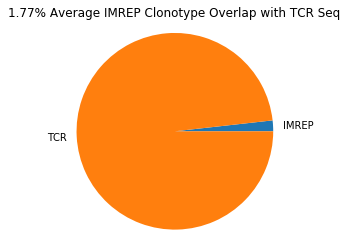

In [10]:
import matplotlib.pyplot as plt

TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
IMREP_overlap = clonotype_overlap_df["overlap_TCR_IMREP"].sum()
overlap = IMREP_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'IMREP', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average IMREP Clonotype Overlap with TCR Seq')
plt.axis('equal')
plt.savefig("../figures/pie_plots/average/IMREP.png", bbox_inches='tight')

# Per Sample IMREP

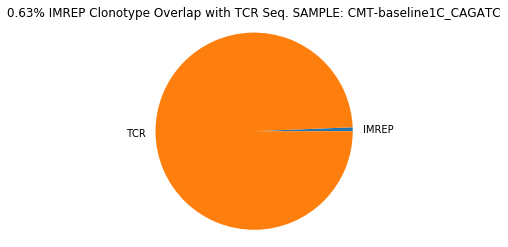

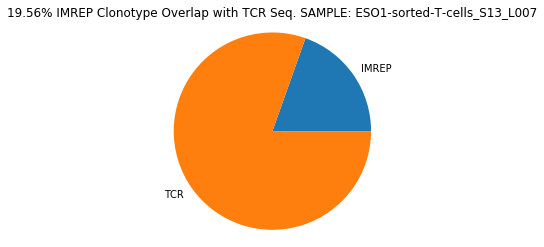

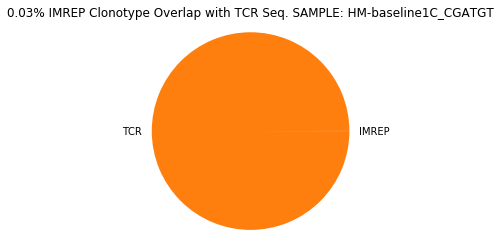

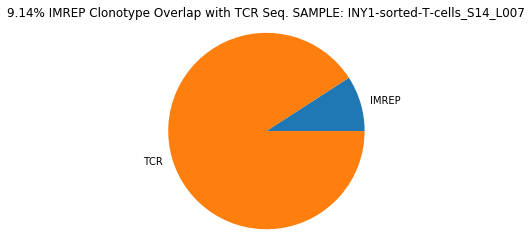

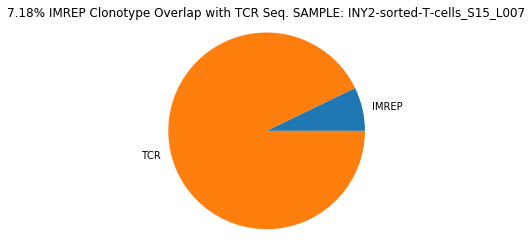

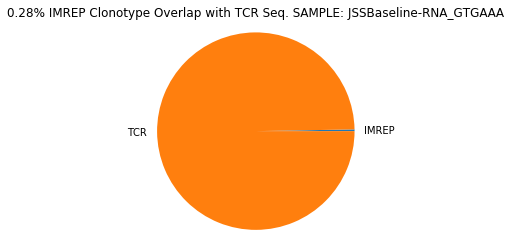

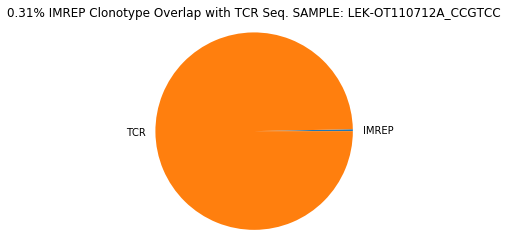

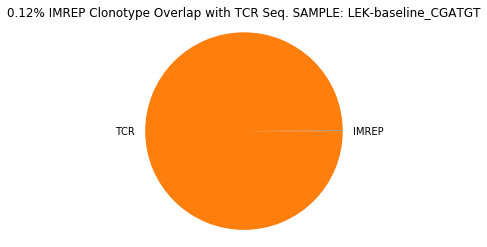

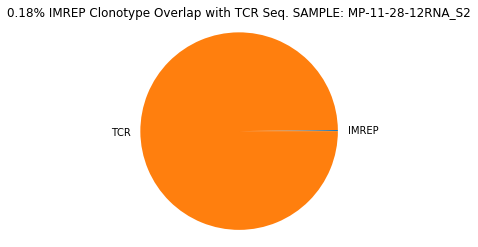

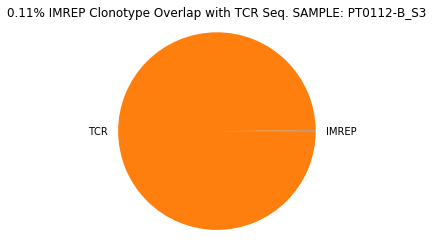

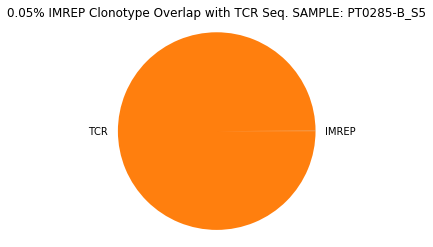

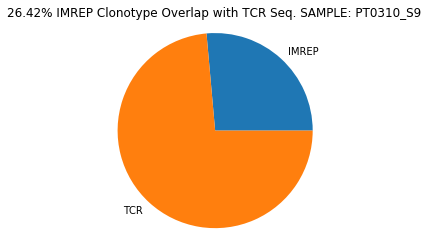

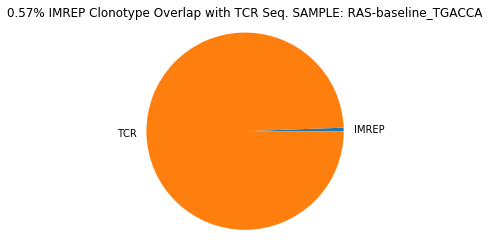

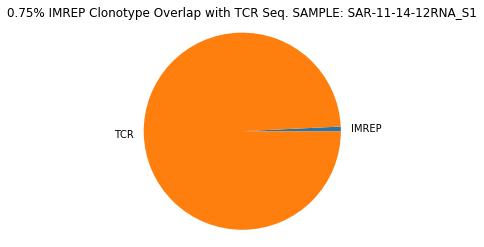

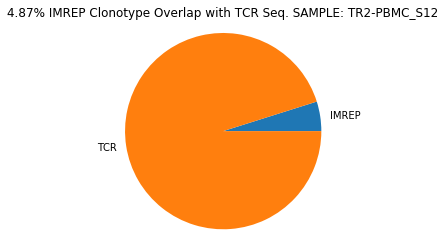

In [11]:
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    IMREP_overlap = df["overlap_TCR_IMREP"].sum()
    overlap = IMREP_overlap *1.0 / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'IMREP', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'IMREP Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    plt.savefig("../figures/pie_plots/IMREP/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

# Average of Per sample Averages IMREP

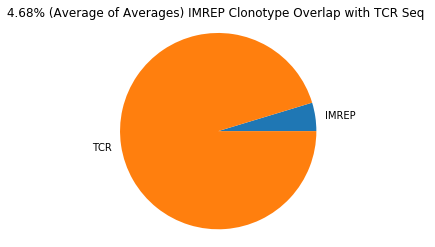

In [12]:
from statistics import mean 

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    IMREP_overlap = df["overlap_TCR_IMREP"].sum()
    overlap = IMREP_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'IMREP', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) IMREP Clonotype Overlap with TCR Seq ')
plt.axis('equal')
plt.savefig("../figures/pie_plots/average/IMREP_avg_of_sample_avgs.png", bbox_inches='tight')

# Average MIXCR

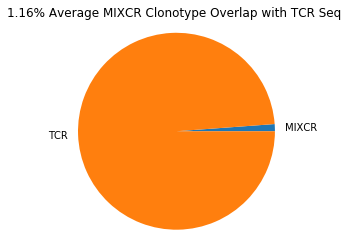

In [13]:
TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
MIXCR_overlap = clonotype_overlap_df["overlap_TCR_MIXCR"].sum()
overlap = MIXCR_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'MIXCR', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average MIXCR Clonotype Overlap with TCR Seq ')
plt.axis('equal')
plt.savefig("../figures/pie_plots/average/MIXCR.png", bbox_inches='tight')

# Per Sample MIXCR

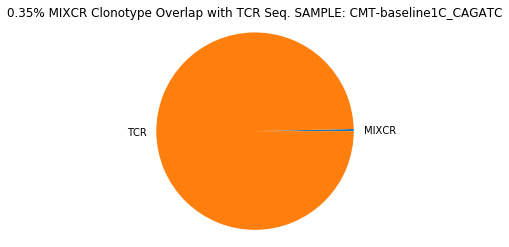

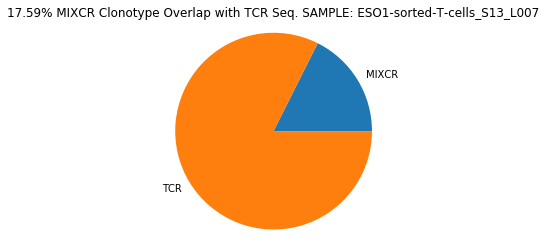

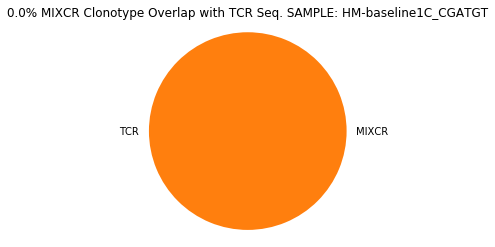

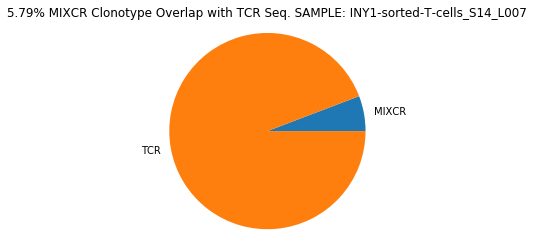

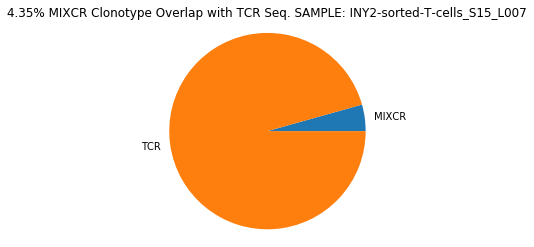

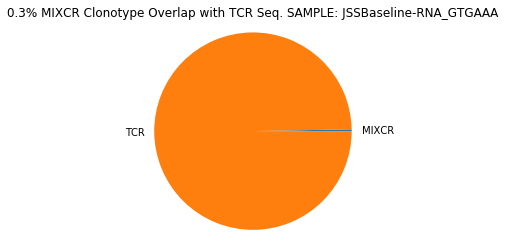

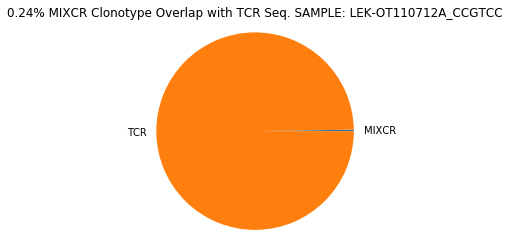

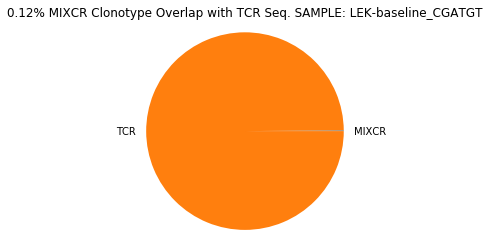

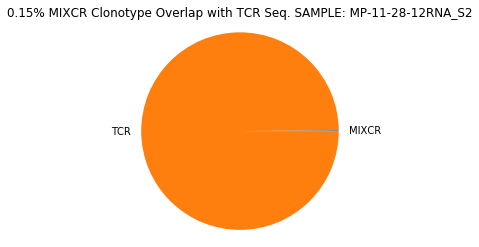

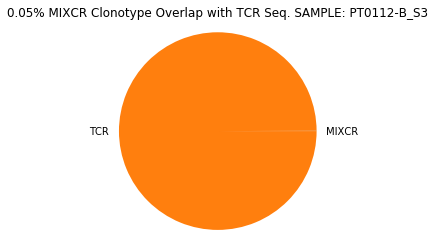

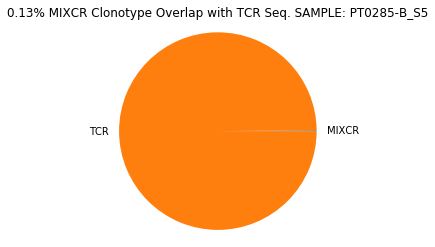

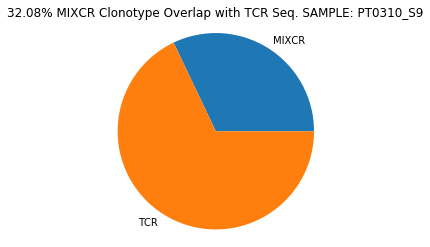

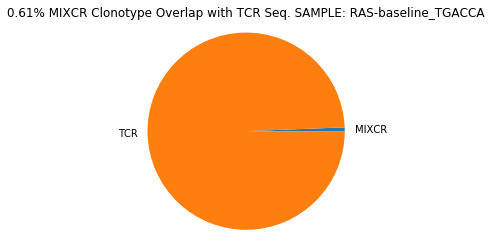

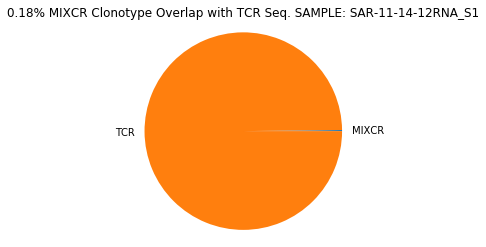

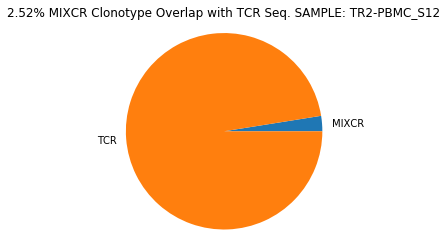

In [14]:

for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    MIXCR_overlap = df["overlap_TCR_MIXCR"].sum()
    overlap = (MIXCR_overlap *1.0) / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'MIXCR', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'MIXCR Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    plt.savefig("../figures/pie_plots/MIXCR/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

# Average of Per sample Averages MIXCR

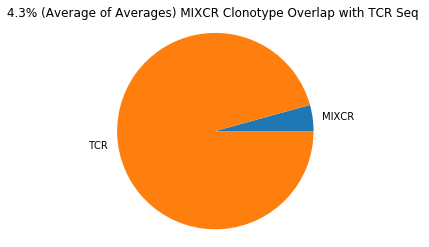

In [15]:
from statistics import mean 

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    MIXCR_overlap = df["overlap_TCR_MIXCR"].sum()
    overlap = MIXCR_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'MIXCR', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) MIXCR Clonotype Overlap with TCR Seq ')
plt.axis('equal')
plt.savefig("../figures/pie_plots/average/MIXCR_avg_of_sample_avgs.png", bbox_inches='tight')

# Average TRUST4

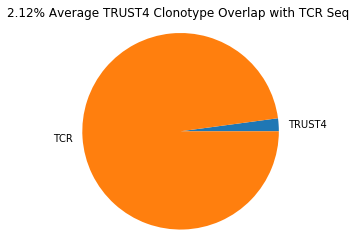

In [16]:
TCR_unique = clonotype_overlap_df["unique_clonotypes_TCR"].sum()
TRUST4_overlap = clonotype_overlap_df["overlap_TCR_TRUST4"].sum()
overlap = TRUST4_overlap *1.0 / TCR_unique
data = [overlap, 1-overlap ]
labels = 'TRUST4', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ 'Average TRUST4 Clonotype Overlap with TCR Seq ')
plt.axis('equal')
plt.savefig("../figures/pie_plots/TRUST4/TRUST4.png", bbox_inches='tight')

# Per Sample TRUST4

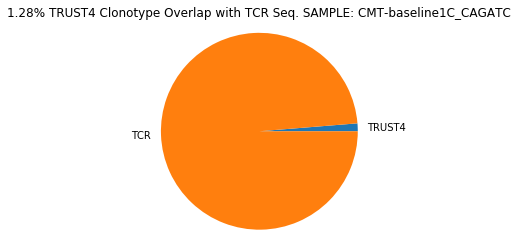

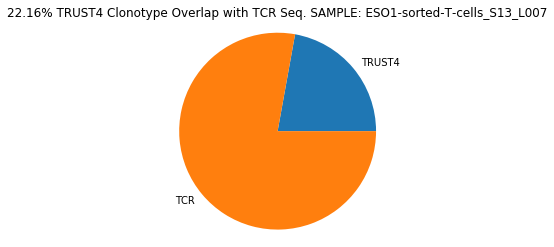

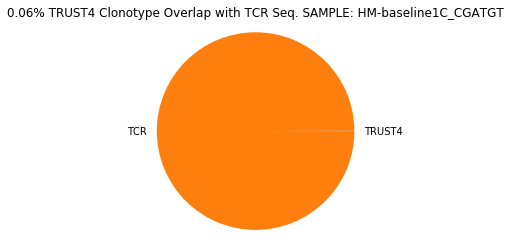

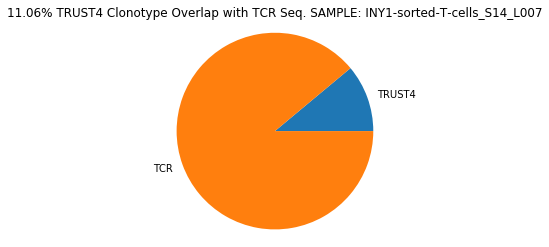

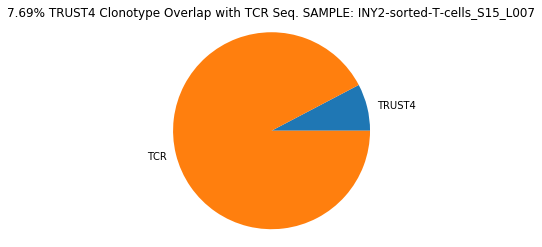

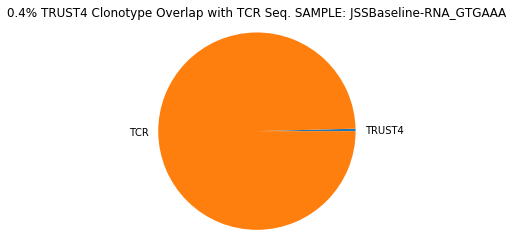

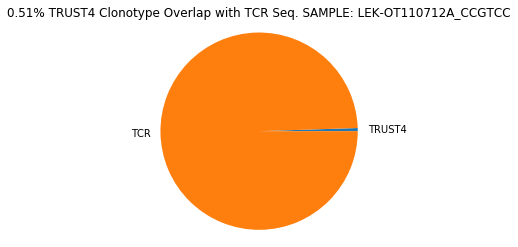

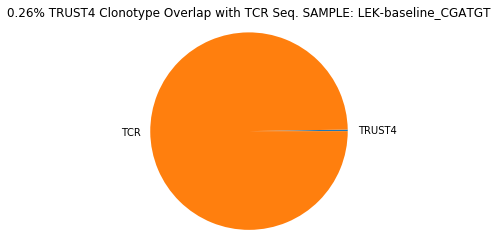

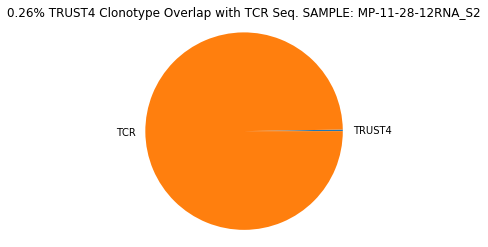

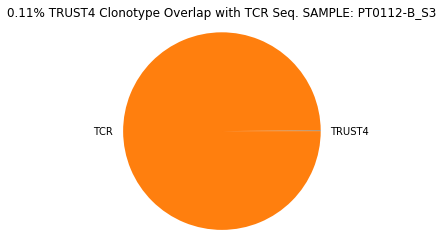

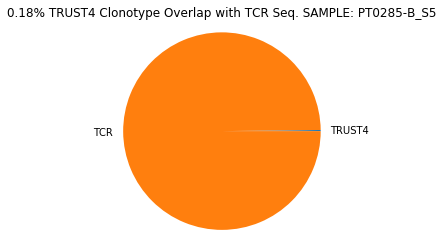

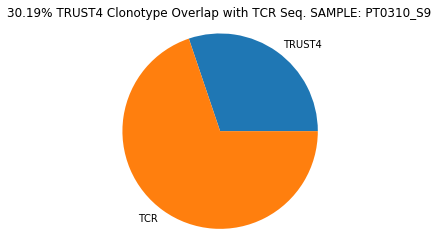

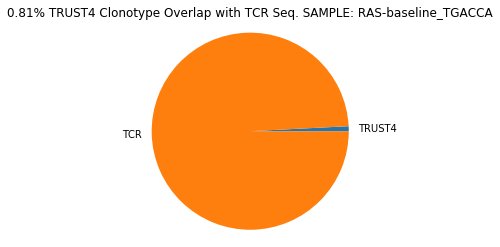

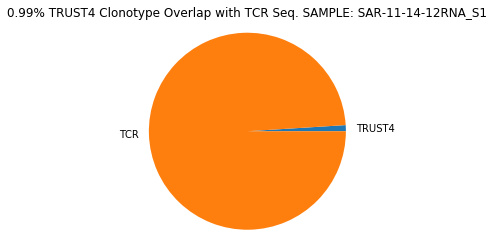

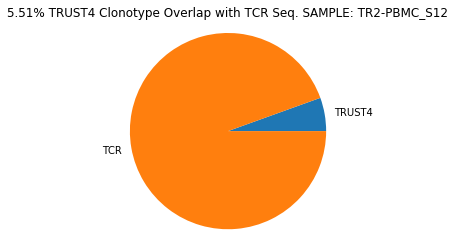

In [17]:
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    TRUST4_overlap = df["overlap_TCR_TRUST4"].sum()
    overlap = TRUST4_overlap *1.0 / TCR_unique
    data = [overlap, 1-overlap ]
    labels = 'TRUST4', 'TCR'
    plt.pie(data, labels = labels)
    plt.title(str(round(overlap*100,2)) + "% "+ 'TRUST4 Clonotype Overlap with TCR Seq. SAMPLE: ' + sample)
    plt.axis('equal')
    plt.savefig("../figures/pie_plots/TRUST4/Pie."+ sample +".png", bbox_inches='tight')
    plt.show()

# Average of Per sample Averages TRUST4

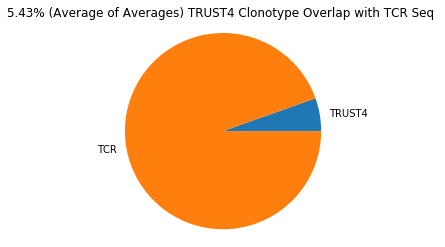

In [18]:
from statistics import mean 

averages_per_sample = []
for sample in samples:
    df = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]
    TCR_unique = df["unique_clonotypes_TCR"].sum()
    TRUST4_overlap = df["overlap_TCR_TRUST4"].sum()
    overlap = TRUST4_overlap *1.0 / TCR_unique
    averages_per_sample.append(overlap)

overlap = mean(averages_per_sample)
data = [overlap, 1-overlap ]
labels = 'TRUST4', 'TCR'
plt.pie(data, labels = labels)
plt.title(str(round(overlap*100,2)) + "% "+ '(Average of Averages) TRUST4 Clonotype Overlap with TCR Seq ')
plt.axis('equal')
plt.savefig("../figures/pie_plots/average/TRUST4_avg_of_sample_avgs.png", bbox_inches='tight')

In [19]:
clonotype_overlap_df.head()

,Sample,unique_clonotypes_TCR,unique_clonotypes_IMREP,unique_clonotypes_MIXCR,unique_clonotypes_TRUST4,overlap_TCR_IMREP,overlap_TCR_MIXCR,overlap_TCR_TRUST4,overlap_TCR_IMREP_set,overlap_TCR_MIXCR_set,overlap_TCR_TRUST4_set,overlap_TCR_IMREP_dict_frequencies,overlap_TCR_MIXCR_dict_frequencies,overlap_TCR_TRUST4_dict_frequencies
0,CMT-baseline1C_CAGATC,9354,1989,2565,3952,59,33,120,"{'CSVGVLAGGMNEQFF', 'CASSLVTLAGGGNNEQFF', 'CAS...","{'CASSLVTLAGGGNNEQFF', 'CASSSELYNEQFF', 'CASSL...","{'CASSLSRGGSGNTIYF', 'CSASGRANTGELFF', 'CASSLA...","{'CSVGVLAGGMNEQFF': [0.00015781556767804742, 5...","{'CASSLVTLAGGGNNEQFF': [3.531537178809453e-05,...","{'CASSLSRGGSGNTIYF': [0.000741622807549985, 2...."
1,ESO1-sorted-T-cells_S13_L007,3001,6728,6074,7740,587,528,665,"{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 4....","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 6....","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 3...."
2,HM-baseline1C_CGATGT,3548,8,7,24,1,0,2,{'CASSSWRGRGSTDTQYF'},set(),"{'CASSSWRGRGSTDTQYF', 'CASSEGPGGSSYNEQFF'}","{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...",{},"{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ..."
3,INY1-sorted-T-cells_S14_L007,3229,8210,3663,9856,295,187,357,"{'CASSVLAGDYEQYF', 'CASSGQGPEAFF', 'CASRNLQGPE...","{'CASTQTGGGNQPQHF', 'CASSSTTGSYQETQYF', 'CASSL...","{'CASRNLQGPEDTQYF', 'CASSSTTGSYQETQYF', 'CAWSV...","{'CASSVLAGDYEQYF': [3.418335954057565e-05, 1.7...","{'CASTQTGGGNQPQHF': [2.2788906360383765e-05, 4...","{'CASRNLQGPEDTQYF': [2.2788906360383765e-05, 1..."
4,INY2-sorted-T-cells_S15_L007,7697,6678,2537,7437,553,335,592,"{'CATGEYEQYF', 'CSVGTQPQHF', 'CASSYKVPGADTQYF'...","{'CASSIGGANTEAFF', 'CSVQTDATRNTGELFF', 'CASSPF...","{'CATGEYEQYF', 'CASRSTTGQGHYGYTF', 'CASSPLDSSN...","{'CATGEYEQYF': [6.53695175402758e-06, 1.425587...","{'CASSIGGANTEAFF': [1.307390350805516e-05, 1.6...","{'CATGEYEQYF': [6.53695175402758e-06, 8.882177..."


# Dot Plots per sample for frequency differences of overlapping clonotypes

correlation coefficient, p-value
(0.26002954076982926, 0.0467069071173786)


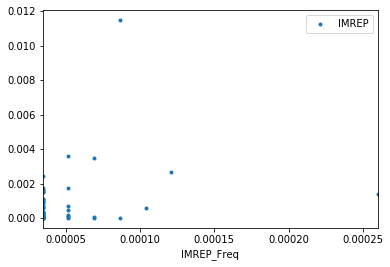

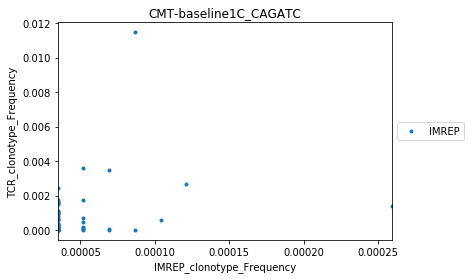

correlation coefficient, p-value
(0.3317109883561449, 0.05931527183981912)


<Figure size 432x288 with 0 Axes>

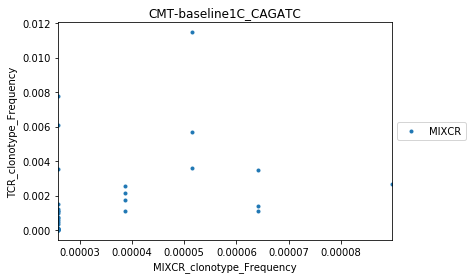

correlation coefficient, p-value
(0.3318859308023184, 0.00021297611358083202)


<Figure size 432x288 with 0 Axes>

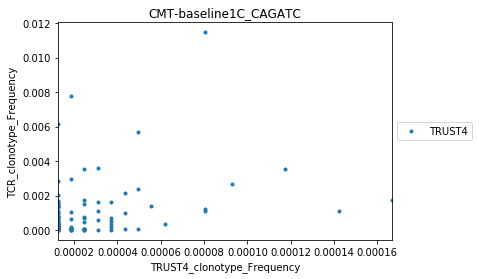

<Figure size 432x288 with 0 Axes>

correlation coefficient, p-value
(0.9999929276622544, 0.0)


<Figure size 432x288 with 0 Axes>

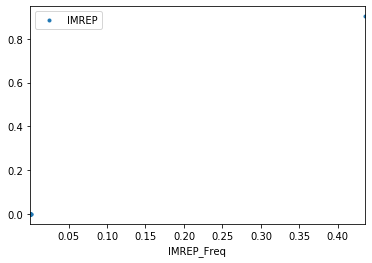

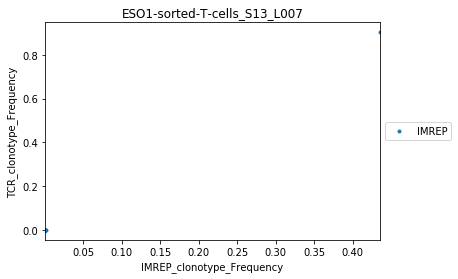

correlation coefficient, p-value
(0.999999009496954, 0.0)


<Figure size 432x288 with 0 Axes>

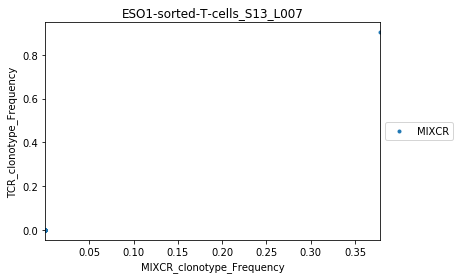

correlation coefficient, p-value
(0.9999955574212653, 0.0)


<Figure size 432x288 with 0 Axes>

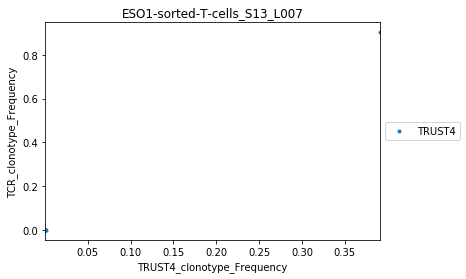

<Figure size 432x288 with 0 Axes>

correlation coefficient, p-value


ValueError: x and y must have length at least 2.

<Figure size 432x288 with 0 Axes>

In [34]:
import scipy

samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

df = clonotype_overlap_df
for sample in samples:
#     IMREP
    IMREP_dict = df.loc[(df['Sample'] == sample)]['overlap_TCR_IMREP_dict_frequencies'].tolist()
    IMREP_dict = eval(IMREP_dict[0])
    IMREP_df = pd.DataFrame.from_dict(IMREP_dict, orient='index', columns=['TCR_Freq', 'IMREP_Freq'])
    IMREP_df.index.name = "overlapping_cdr3"
    IMREP_df = IMREP_df.reset_index()
#     print(IMREP_df.head())


#     MIXCR
    MIXCR_dict = df.loc[(df['Sample'] == sample)]['overlap_TCR_MIXCR_dict_frequencies'].tolist()
    MIXCR_dict = eval(MIXCR_dict[0])
    MIXCR_df = pd.DataFrame.from_dict(MIXCR_dict, orient='index', columns=['TCR_Freq', 'MIXCR_Freq'])
    MIXCR_df.index.name = "overlapping_cdr3"
    MIXCR_df = MIXCR_df.reset_index()
#     print(MIXCR_df.head())
    
#     TRUST4

    TRUST4_dict = df.loc[(df['Sample'] == sample)]['overlap_TCR_TRUST4_dict_frequencies'].tolist()
    TRUST4_dict = eval(TRUST4_dict[0])
    TRUST4_df = pd.DataFrame.from_dict(TRUST4_dict, orient='index', columns=['TCR_Freq', 'TRUST4_Freq'])
    TRUST4_df.index.name = "overlapping_cdr3"
    TRUST4_df = TRUST4_df.reset_index()
#     print(TRUST4_df.head())
    
    if IMREP_df.empty == False:
        print("correlation coefficient, p-value")
        print(scipy.stats.pearsonr(IMREP_df["IMREP_Freq"], IMREP_df["TCR_Freq"]))
        
        combined_ax = IMREP_df.plot(x='IMREP_Freq', y='TCR_Freq', style='.', label='IMREP')
        IMREP_ax = IMREP_df.plot(x='IMREP_Freq', y='TCR_Freq', style='.', label='IMREP')
        IMREP_ax.set_xlabel("IMREP_clonotype_Frequency")
        IMREP_ax.set_ylabel("TCR_clonotype_Frequency") 
        IMREP_ax.set(title = sample)
        IMREP_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig("../figures/frequency_comparison/IMREP/compare_freq_" + sample +"_.png", bbox_inches='tight')
    if MIXCR_df.empty == False:
        print("correlation coefficient, p-value")
        print(scipy.stats.pearsonr(MIXCR_df["MIXCR_Freq"], MIXCR_df["TCR_Freq"]))
        
        combined_ax = MIXCR_df.plot(ax=combined_ax, x='MIXCR_Freq', y='TCR_Freq', style='.', label = "MIXCR")
        MIXCR_ax = MIXCR_df.plot(x='MIXCR_Freq', y='TCR_Freq', style='.', label='MIXCR')
        MIXCR_ax.set_xlabel("MIXCR_clonotype_Frequency")
        MIXCR_ax.set_ylabel("TCR_clonotype_Frequency") 
        MIXCR_ax.set(title = sample)
        MIXCR_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig("../figures/frequency_comparison/MIXCR/compare_freq_" + sample +"_.png", bbox_inches='tight')
    if TRUST4_df.empty == False:    
        print("correlation coefficient, p-value")
        print(scipy.stats.pearsonr(TRUST4_df["TRUST4_Freq"], TRUST4_df["TCR_Freq"]))
        
        combined_ax = TRUST4_df.plot(ax=combined_ax, x='TRUST4_Freq', y='TCR_Freq', style='.', label = "TRUST4")
        TRUST4_ax = TRUST4_df.plot(x='TRUST4_Freq', y='TCR_Freq', style='.', label='TRUST4')
        TRUST4_ax.set_xlabel("TRUST4_clonotype_Frequency")
        TRUST4_ax.set_ylabel("TCR_clonotype_Frequency") 
        TRUST4_ax.set(title = sample)
        TRUST4_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig("../figures/frequency_comparison/TRUST4/compare_freq_" + sample +"_.png", bbox_inches='tight')

    
    
    
    combined_ax.set_xlabel("tool_clonotype_Frequency")
    combined_ax.set_ylabel("TCR_clonotype_Frequency") 
    combined_ax.set(title = sample)
    combined_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    plt.savefig("../figures/frequency_comparison/all_tools/compare_freq_" + sample +"_.png", bbox_inches='tight')

# Dot plots per sample for percent of repertoire captured by frequency

In [24]:
merge_IMREP_TRUST4_MIXCR_TCR.head()

,Sample,CDR3,nReads_TCR,total_reads_in_sample_x,Frequency_TCR,nReads_MIXCR,total_reads_in_sample_y,Frequency_MIXCR,nReads_IMREP,total_reads_in_sample_x,Frequency_IMREP,nReads_TRUST4,total_reads_in_sample_y,Frequency_TRUST4
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
clonotype_overlap_df.head()

,Sample,unique_clonotypes_TCR,unique_clonotypes_IMREP,unique_clonotypes_MIXCR,unique_clonotypes_TRUST4,overlap_TCR_IMREP,overlap_TCR_MIXCR,overlap_TCR_TRUST4,overlap_TCR_IMREP_set,overlap_TCR_MIXCR_set,overlap_TCR_TRUST4_set,overlap_TCR_IMREP_dict_frequencies,overlap_TCR_MIXCR_dict_frequencies,overlap_TCR_TRUST4_dict_frequencies
0,CMT-baseline1C_CAGATC,9354,1989,2565,3952,59,33,120,"{'CSVGVLAGGMNEQFF', 'CASSLVTLAGGGNNEQFF', 'CAS...","{'CASSLVTLAGGGNNEQFF', 'CASSSELYNEQFF', 'CASSL...","{'CASSLSRGGSGNTIYF', 'CSASGRANTGELFF', 'CASSLA...","{'CSVGVLAGGMNEQFF': [0.00015781556767804742, 5...","{'CASSLVTLAGGGNNEQFF': [3.531537178809453e-05,...","{'CASSLSRGGSGNTIYF': [0.000741622807549985, 2...."
1,ESO1-sorted-T-cells_S13_L007,3001,6728,6074,7740,587,528,665,"{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF', 'CAISTPGNSPLHF', 'CASSTRSY...","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 4....","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 6....","{'CASSVFIGRNTEAFF': [2.208066065336675e-05, 3...."
2,HM-baseline1C_CGATGT,3548,8,7,24,1,0,2,{'CASSSWRGRGSTDTQYF'},set(),"{'CASSSWRGRGSTDTQYF', 'CASSEGPGGSSYNEQFF'}","{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...",{},"{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ..."
3,INY1-sorted-T-cells_S14_L007,3229,8210,3663,9856,295,187,357,"{'CASSVLAGDYEQYF', 'CASSGQGPEAFF', 'CASRNLQGPE...","{'CASTQTGGGNQPQHF', 'CASSSTTGSYQETQYF', 'CASSL...","{'CASRNLQGPEDTQYF', 'CASSSTTGSYQETQYF', 'CAWSV...","{'CASSVLAGDYEQYF': [3.418335954057565e-05, 1.7...","{'CASTQTGGGNQPQHF': [2.2788906360383765e-05, 4...","{'CASRNLQGPEDTQYF': [2.2788906360383765e-05, 1..."
4,INY2-sorted-T-cells_S15_L007,7697,6678,2537,7437,553,335,592,"{'CATGEYEQYF', 'CSVGTQPQHF', 'CASSYKVPGADTQYF'...","{'CASSIGGANTEAFF', 'CSVQTDATRNTGELFF', 'CASSPF...","{'CATGEYEQYF', 'CASRSTTGQGHYGYTF', 'CASSPLDSSN...","{'CATGEYEQYF': [6.53695175402758e-06, 1.425587...","{'CASSIGGANTEAFF': [1.307390350805516e-05, 1.6...","{'CATGEYEQYF': [6.53695175402758e-06, 8.882177..."


In [26]:
# overlap_frequencies_df =

samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

# DataFrames
# clonotype_overlap_df
# merge_IMREP_TRUST4_MIXCR_TCR


frequency_overlap_by_tool_df = pd.DataFrame(columns=['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool'])


for sample in samples:
#     TCR_SEQ
    TCR_df = merge_IMREP_TRUST4_MIXCR_TCR.loc[(merge_IMREP_TRUST4_MIXCR_TCR['Sample'] == sample)][["Frequency_TCR","CDR3"]]
    TCR_df["Frequency_TCR"] = TCR_df["Frequency_TCR"].round(4)
    TCR_df = TCR_df.groupby(['Frequency_TCR']).count().reset_index()
    TCR_df = TCR_df.rename(columns={"CDR3": "count_total_cdr3_in_TCR_by_freq", "Frequency_TCR": "TCR_Freq"})
#     print(TCR_df.head())
#     print(TCR_df["count_total_cdr3_in_TCR_by_freq"].unique())    
    
#     IMREP
    IMREP_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_IMREP_dict_frequencies'].tolist()
    IMREP_dict = eval(IMREP_dict[0])
    IMREP_df = pd.DataFrame.from_dict(IMREP_dict, orient='index', columns=['TCR_Freq', 'IMREP_Freq'])
    IMREP_df.index.name = "overlapping_cdr3"
    IMREP_df = IMREP_df.reset_index()
    IMREP_df["TCR_Freq"] = IMREP_df["TCR_Freq"].round(4)
    IMREP_df = IMREP_df.groupby(['TCR_Freq']).count().reset_index()
    IMREP_df = IMREP_df[["TCR_Freq", "overlapping_cdr3"]]
    IMREP_df = IMREP_df.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    IMREP_df["Sample"] = sample
    IMREP_df["Tool"] = "IMREP"
    IMREP_df = pd.merge(IMREP_df,TCR_df, on="TCR_Freq")
    IMREP_df = IMREP_df[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,IMREP_df])
#     print(IMREP_df.head())

#     MIXCR
    MIXCR_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_MIXCR_dict_frequencies'].tolist()
    MIXCR_dict = eval(MIXCR_dict[0])
    MIXCR_df = pd.DataFrame.from_dict(MIXCR_dict, orient='index', columns=['TCR_Freq', 'MIXCR_Freq'])
    MIXCR_df.index.name = "overlapping_cdr3"
    MIXCR_df = MIXCR_df.reset_index()
    MIXCR_df["TCR_Freq"] = MIXCR_df["TCR_Freq"].round(4)
    MIXCR_df = MIXCR_df.groupby(['TCR_Freq']).count().reset_index()
    MIXCR_df = MIXCR_df[["TCR_Freq", "overlapping_cdr3"]]
    MIXCR_df = MIXCR_df.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    MIXCR_df["Sample"] = sample
    MIXCR_df["Tool"] = "MIXCR"
    MIXCR_df = pd.merge(MIXCR_df,TCR_df, on="TCR_Freq")
    MIXCR_df = MIXCR_df[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,MIXCR_df])
#     print(MIXCR_df.head())
    
#     TRUST4

    TRUST4_dict = clonotype_overlap_df.loc[(clonotype_overlap_df['Sample'] == sample)]['overlap_TCR_TRUST4_dict_frequencies'].tolist()
    TRUST4_dict = eval(TRUST4_dict[0])
    TRUST4_df = pd.DataFrame.from_dict(TRUST4_dict, orient='index', columns=['TCR_Freq', 'TRUST4_Freq'])
    TRUST4_df.index.name = "overlapping_cdr3"
    TRUST4_df = TRUST4_df.reset_index()
    TRUST4_df["TCR_Freq"] = TRUST4_df["TCR_Freq"].round(4)
    TRUST4_df = TRUST4_df.groupby(['TCR_Freq']).count().reset_index()
    TRUST4_df = TRUST4_df[["TCR_Freq", "overlapping_cdr3"]]
    TRUST4_df = TRUST4_df.rename(columns={"overlapping_cdr3": "count_overlap_cdr3_from_Tool"})
    TRUST4_df["Sample"] = sample
    TRUST4_df["Tool"] = "TRUST4"
    TRUST4_df = pd.merge(TRUST4_df,TCR_df, on="TCR_Freq")
    TRUST4_df = TRUST4_df[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq", 'Sample', 'Tool']]
    frequency_overlap_by_tool_df = pd.concat([frequency_overlap_by_tool_df,TRUST4_df])
#     print(TRUST4_df.head())

# Frequency category rounded to nearest thousandth
frequency_overlap_by_tool_df["percent_CDR3_captured_by_tool_by_TCR_frequency"] = (frequency_overlap_by_tool_df["count_overlap_cdr3_from_Tool"]*100.0)/frequency_overlap_by_tool_df["count_total_cdr3_in_TCR_by_freq"]
frequency_overlap_by_tool_df.percent_CDR3_captured_by_tool_by_TCR_frequency = frequency_overlap_by_tool_df.percent_CDR3_captured_by_tool_by_TCR_frequency.astype(float)
frequency_overlap_by_tool_df = frequency_overlap_by_tool_df[['TCR_Freq', 'count_overlap_cdr3_from_Tool',"count_total_cdr3_in_TCR_by_freq",'percent_CDR3_captured_by_tool_by_TCR_frequency', 'Sample', 'Tool']]


In [28]:
frequency_overlap_by_tool_df.head()


,TCR_Freq,count_overlap_cdr3_from_Tool,count_total_cdr3_in_TCR_by_freq,percent_CDR3_captured_by_tool_by_TCR_frequency,Sample,Tool
0,0.0000,16,8752,0.182815,CMT-baseline1C_CAGATC,IMREP
1,0.0001,10,3452,0.289687,CMT-baseline1C_CAGATC,IMREP
2,0.0002,4,558,0.716846,CMT-baseline1C_CAGATC,IMREP
3,0.0003,3,241,1.244813,CMT-baseline1C_CAGATC,IMREP
4,0.0004,2,126,1.587302,CMT-baseline1C_CAGATC,IMREP


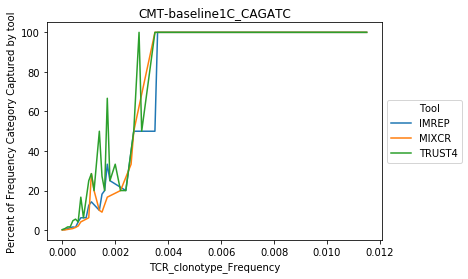

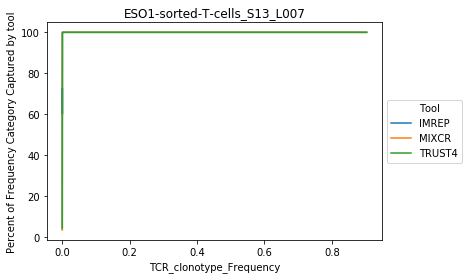

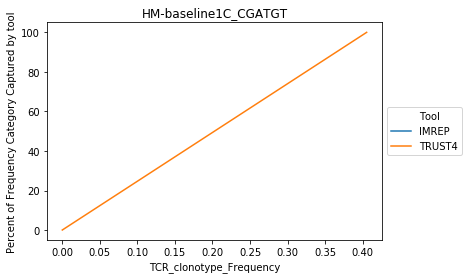

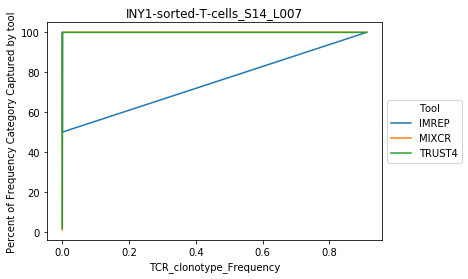

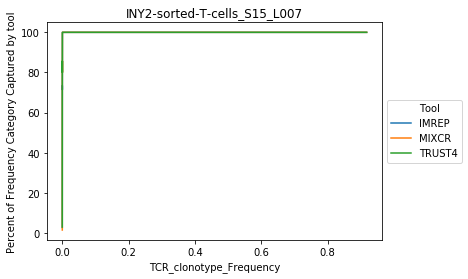

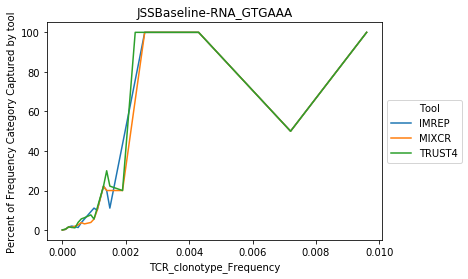

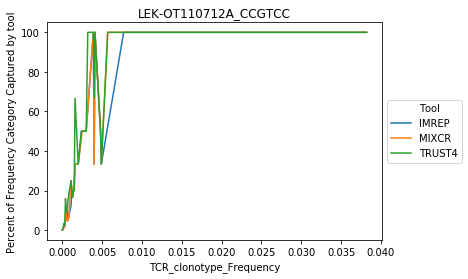

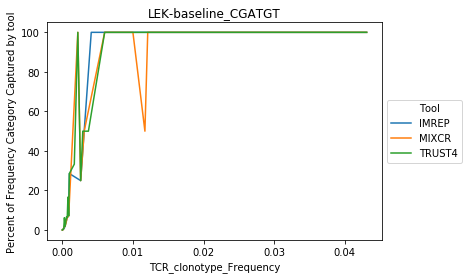

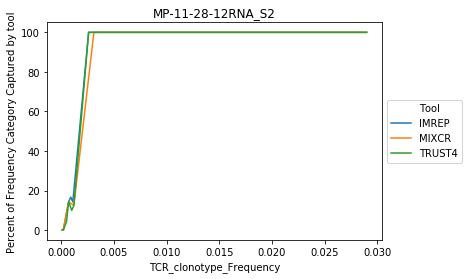

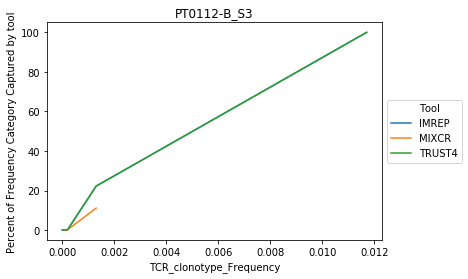

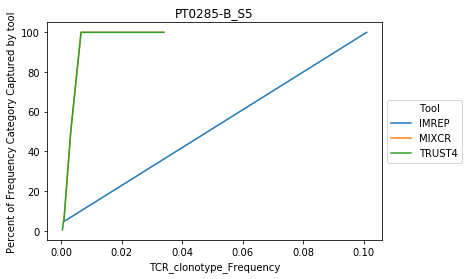

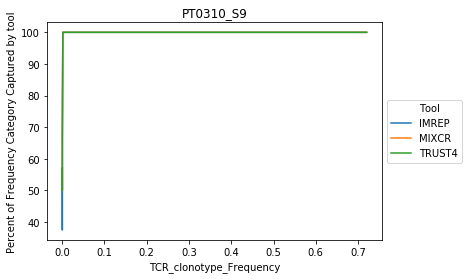

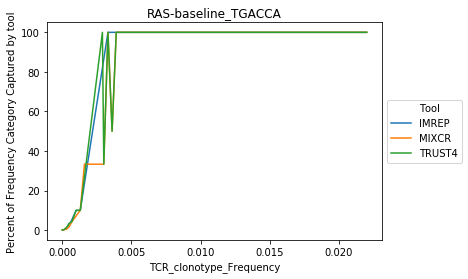

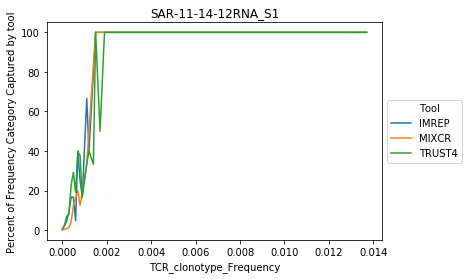

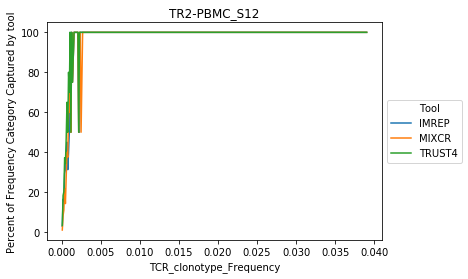

In [29]:

samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']



for sample in samples:
    graph_per_sample_df = frequency_overlap_by_tool_df.loc[(frequency_overlap_by_tool_df['Sample'] == sample)]
    
    ax = sns.lineplot(x="TCR_Freq", y="percent_CDR3_captured_by_tool_by_TCR_frequency", hue="Tool", data=graph_per_sample_df)
    ax.set_xlabel("TCR_clonotype_Frequency")
    ax.set_ylabel("Percent of Frequency Category Captured by tool")
    ax.set(title = sample)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig = ax.get_figure()
    plt.show()
    fig.savefig("../figures/clonotype_captured_by_frequency/" + sample +".png", bbox_inches='tight')
        
# sns_plot = sns.pairplot(df, hue='species', size=2.5)
# sns_plot.savefig("output.png")


# CDR3 overlap between tools Venn Diagram

In [30]:
frequency_overlap_by_tool_df.head()

,TCR_Freq,count_overlap_cdr3_from_Tool,count_total_cdr3_in_TCR_by_freq,percent_CDR3_captured_by_tool_by_TCR_frequency,Sample,Tool
0,0.0000,16,8752,0.182815,CMT-baseline1C_CAGATC,IMREP
1,0.0001,10,3452,0.289687,CMT-baseline1C_CAGATC,IMREP
2,0.0002,4,558,0.716846,CMT-baseline1C_CAGATC,IMREP
3,0.0003,3,241,1.244813,CMT-baseline1C_CAGATC,IMREP
4,0.0004,2,126,1.587302,CMT-baseline1C_CAGATC,IMREP


In [2]:
import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline

In [3]:
# Combinations
# a = TCR
# b = IMREP
# c = MIXCR
# d = TRUST4
# subsets = [a, b, c, d, ab, ac, ad, bc, bd, cd, abc, abd, acd, bcd, abcd]
subsets = [TCR, IMREP, MIXCR, TRUST4, TCR_IMREP, TCR_MIXCR, TCR_TRUST4, IMREP_MIXCR, IMREP_TRUST4, MIXCR_TRUST4, TCR_IMREP_MIXCR, TCR_IMREP_TRUST4, TCR_MIXCR_TRUST4, IMREP_MIXCR_TRUST4, TCR_IMREP_MIXCR_TRUST4]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('IMREP', 'TRUST4', 'MIXCR', 'TCR'), set_label_fontsize=20, subset_label_fontsize=24);

ax.set_title('Clonotype Overlap', fontsize=24)

# plt.savefig('../figures/venndiagrams/vendiagram' + sample_name + '.png', bbox_inches='tight')

NameError: name 'venn' is not defined

# Check frequencies of clonotypes within each sample across tools

In [ ]:
df = merge_IMREP_TRUST4_MIXCR_TCR
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

### TCR check

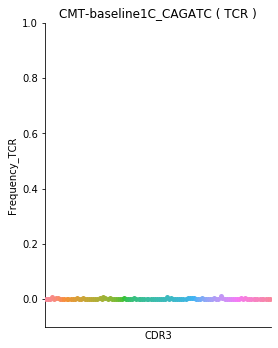

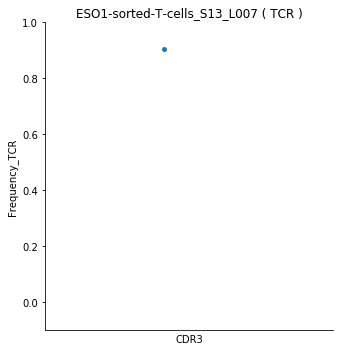

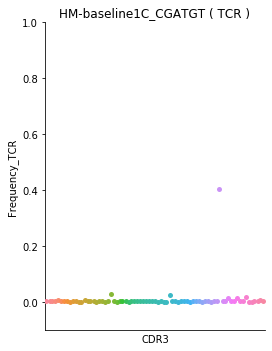

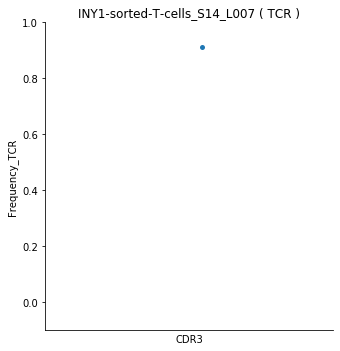

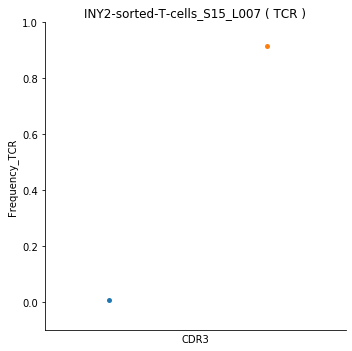

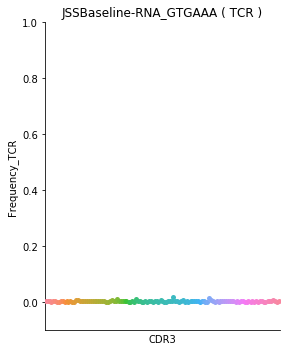

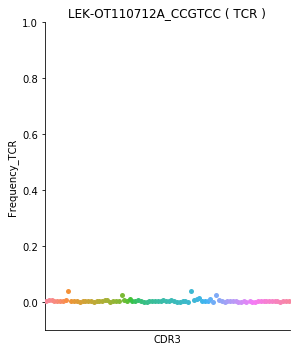

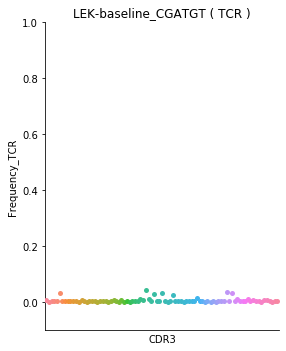

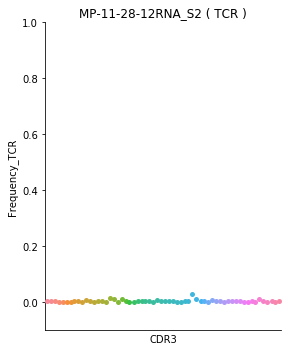

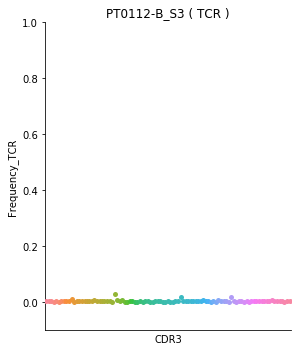

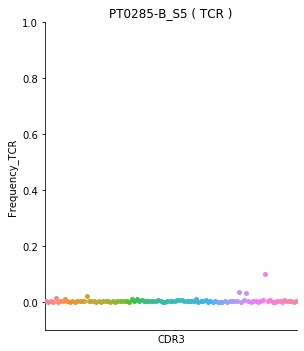

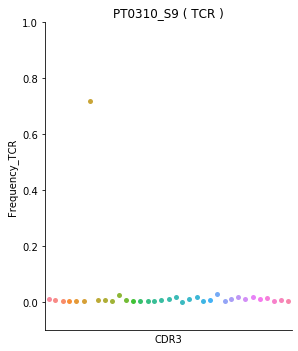

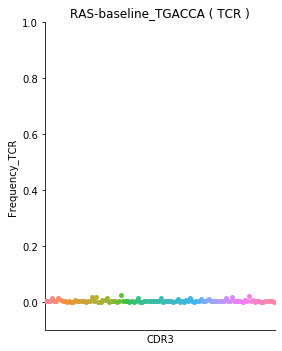

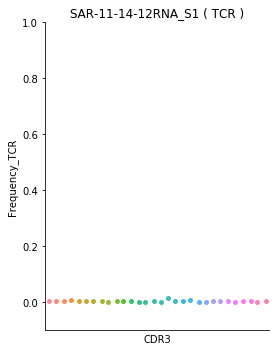

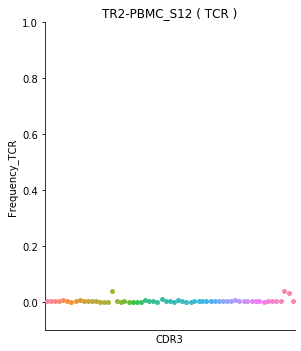

In [26]:
for sample in samples:
    d = df.loc[(df['Sample'] == sample) & (df['Frequency_TCR'] > 0.001)]
    ax = sns.catplot(x="CDR3", y="Frequency_TCR", data=d).set(title = sample +" ( TCR )");
    plt.ylim(-0.1, 1)
    plt.xticks(color='w')
    plt.xticks([])
    plt.savefig("../figures/frequencies/TCR/Frequency_TCR_" + sample +"_.png", bbox_inches='tight')
    
    



### MIXCR check

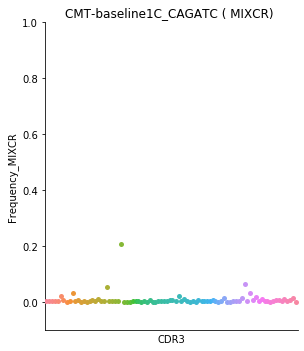

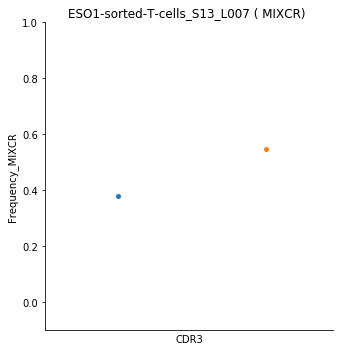

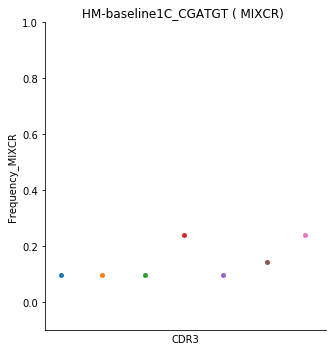

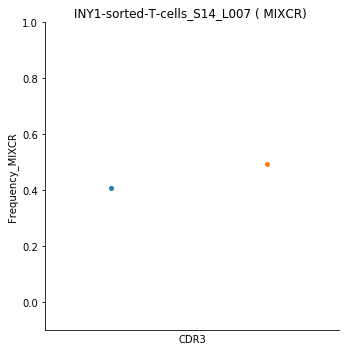

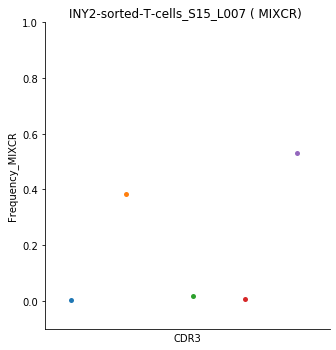

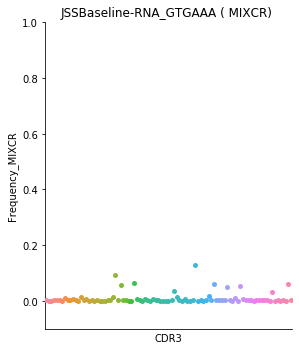

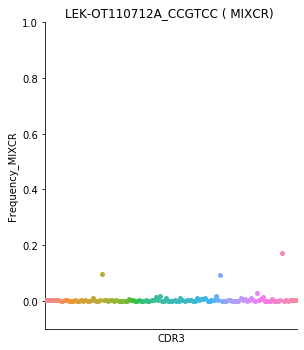

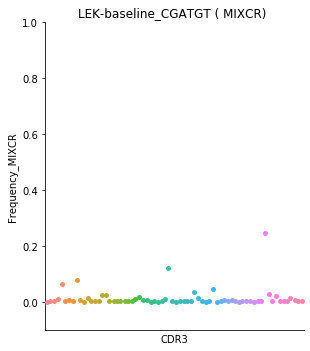

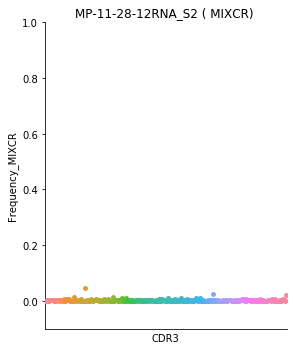

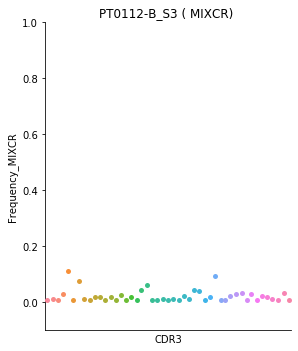

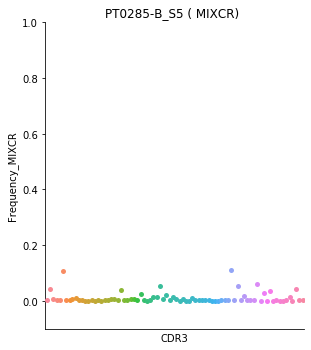

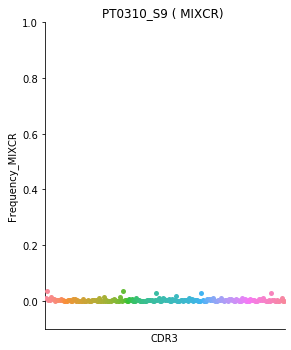

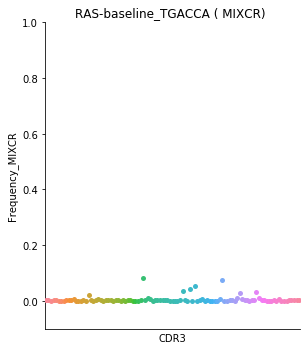

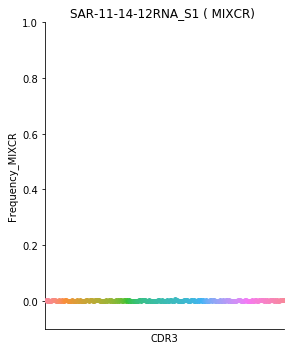

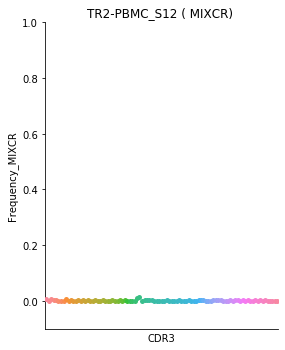

In [88]:
for sample in samples:
    d = df.loc[(df['Sample'] == sample) & (df['Frequency_MIXCR'] > 0.001)]
    ax = sns.catplot(x="CDR3", y="Frequency_MIXCR", data=d).set(title = sample +" ( MIXCR) ");
    plt.ylim(-0.1, 1)
    plt.xticks(color='w')
    plt.xticks([])
    plt.savefig("../figures/frequencies/MIXCR/Frequency_MIXCR_" + sample +"_.png", bbox_inches='tight')
    
    

### TRUST4 check

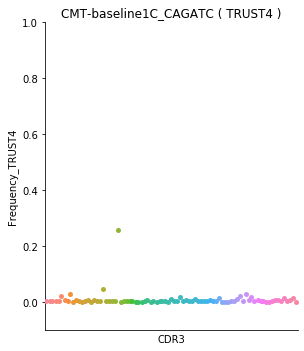

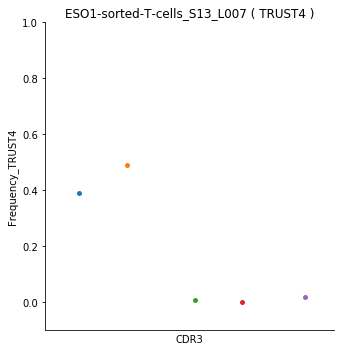

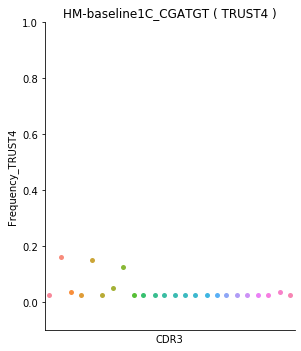

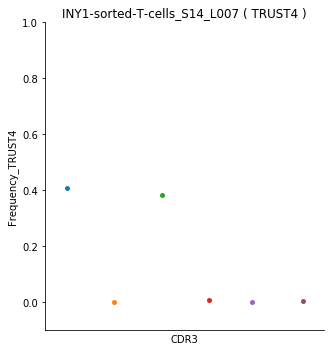

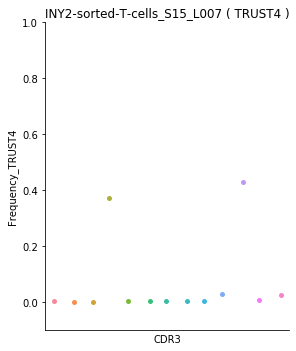

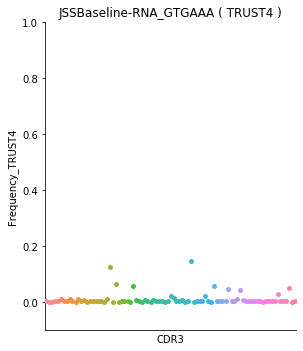

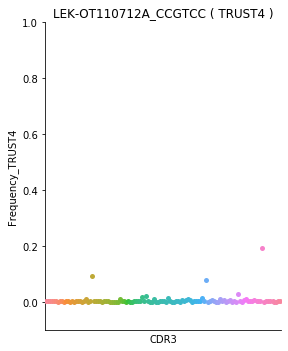

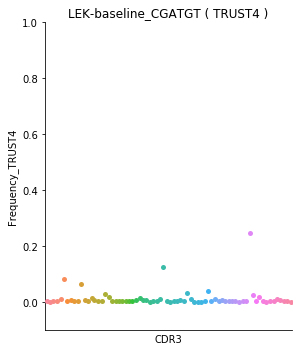

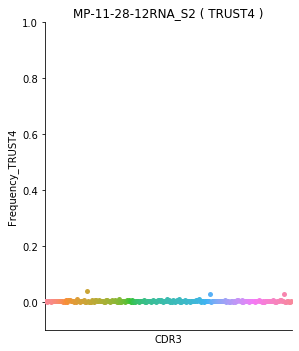

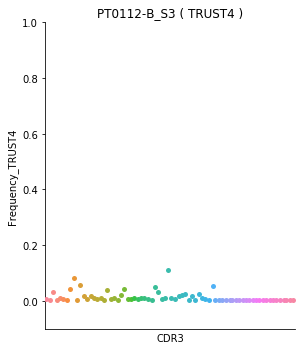

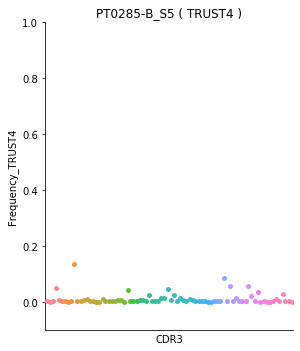

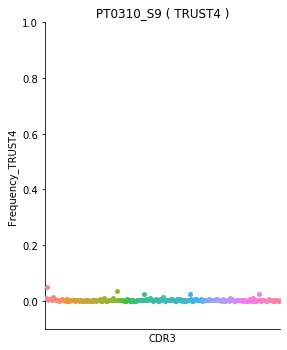

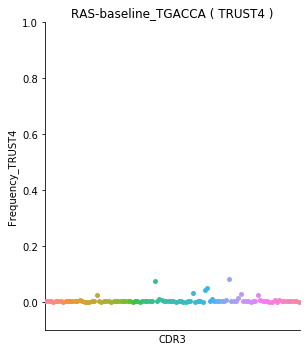

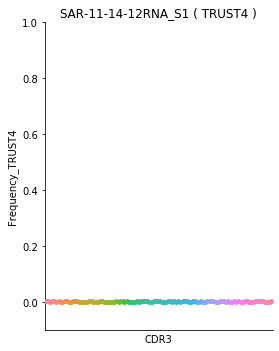

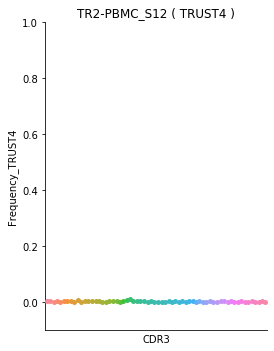

In [89]:
for sample in samples:
    d = df.loc[(df['Sample'] == sample) & (df['Frequency_TRUST4'] > 0.001)]
    ax = sns.catplot(x="CDR3", y="Frequency_TRUST4", data=d).set(title = sample +" ( TRUST4 )");
    plt.ylim(-0.1, 1)
    plt.xticks(color='w')
    plt.xticks([])
    plt.savefig("../figures/frequencies/TRUST4/Frequency_TRUST4_" + sample +"_.png", bbox_inches='tight')

### IMREP check

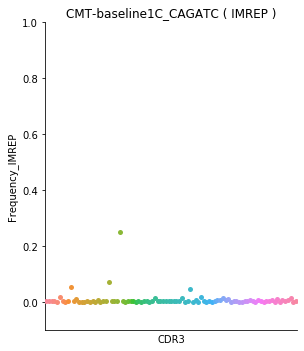

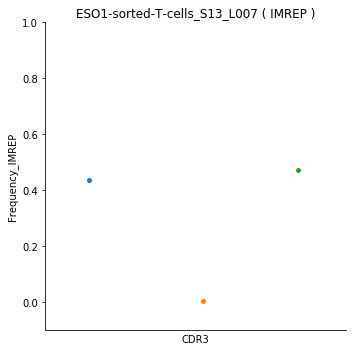

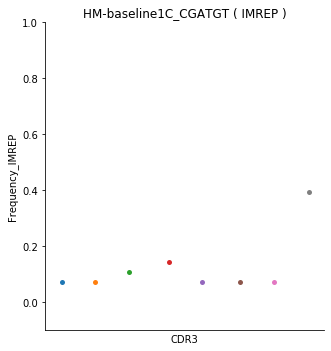

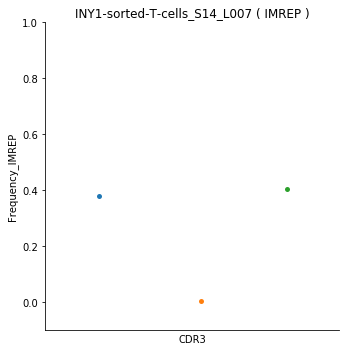

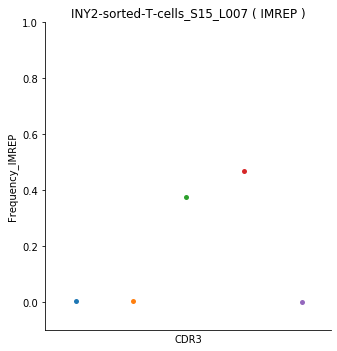

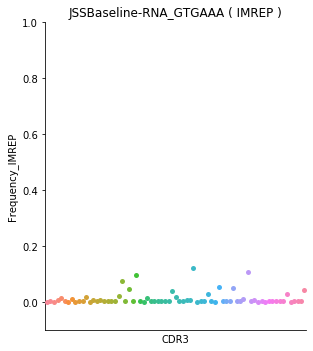

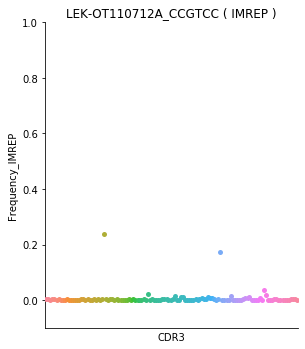

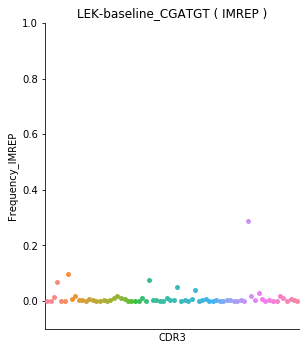

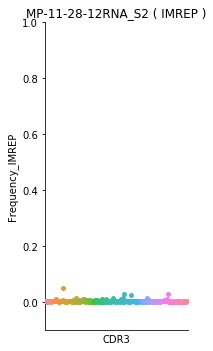

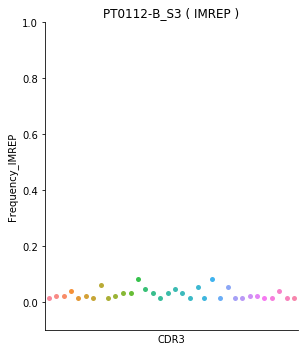

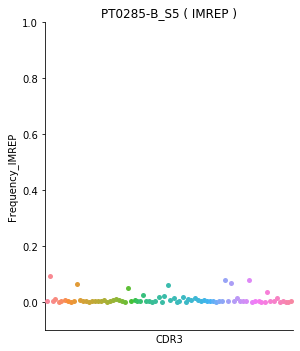

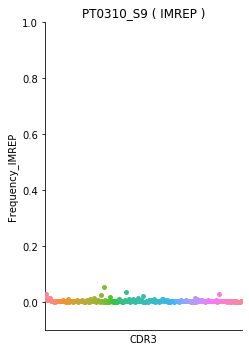

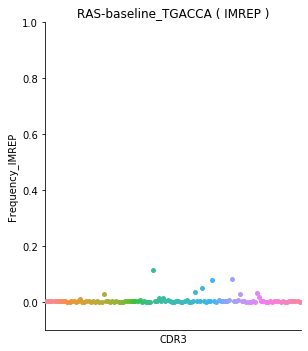

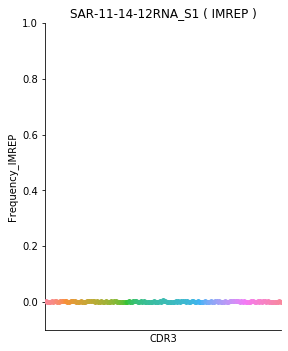

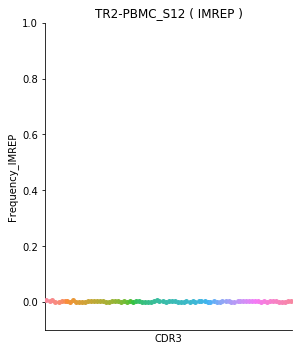

In [90]:
for sample in samples:
    d = df.loc[(df['Sample'] == sample) & (df['Frequency_IMREP'] > 0.001)]
    ax = sns.catplot(x="CDR3", y="Frequency_IMREP", data=d).set(title = sample +" ( IMREP )");
    plt.ylim(-0.1, 1)
    plt.xticks(color='w')
    plt.xticks([])
    plt.savefig("../figures/frequencies/IMREP/Frequency_IMREP_" + sample +"_.png", bbox_inches='tight')
    